## LA CRIME DATA ANALYSIS 2020

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'TO DO LIST:'
# fix legend for FBI crime part bar graph

In [3]:
#import data set
df = pd.read_csv('/Users/tanianixon/Downloads/Crime2020.csv')

#print first 5 rows of table
df.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


### Top 15 Weapons Used 

In [7]:
wep_use = df['Weapon Desc'].value_counts().head(15)

#attaching .to_string() to printed list gets rid of the name and dtype output
print(wep_use.to_string())

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174710
UNKNOWN WEAPON/OTHER WEAPON                        36342
VERBAL THREAT                                      23839
HAND GUN                                           20184
SEMI-AUTOMATIC PISTOL                               7267
KNIFE WITH BLADE 6INCHES OR LESS                    6836
UNKNOWN FIREARM                                     6581
OTHER KNIFE                                         5880
MACE/PEPPER SPRAY                                   3730
VEHICLE                                             3260
ROCK/THROWN OBJECT                                  2739
PIPE/METAL PIPE                                     2469
BOTTLE                                              2414
FOLDING KNIFE                                       2266
STICK                                               2249


### Visualization 

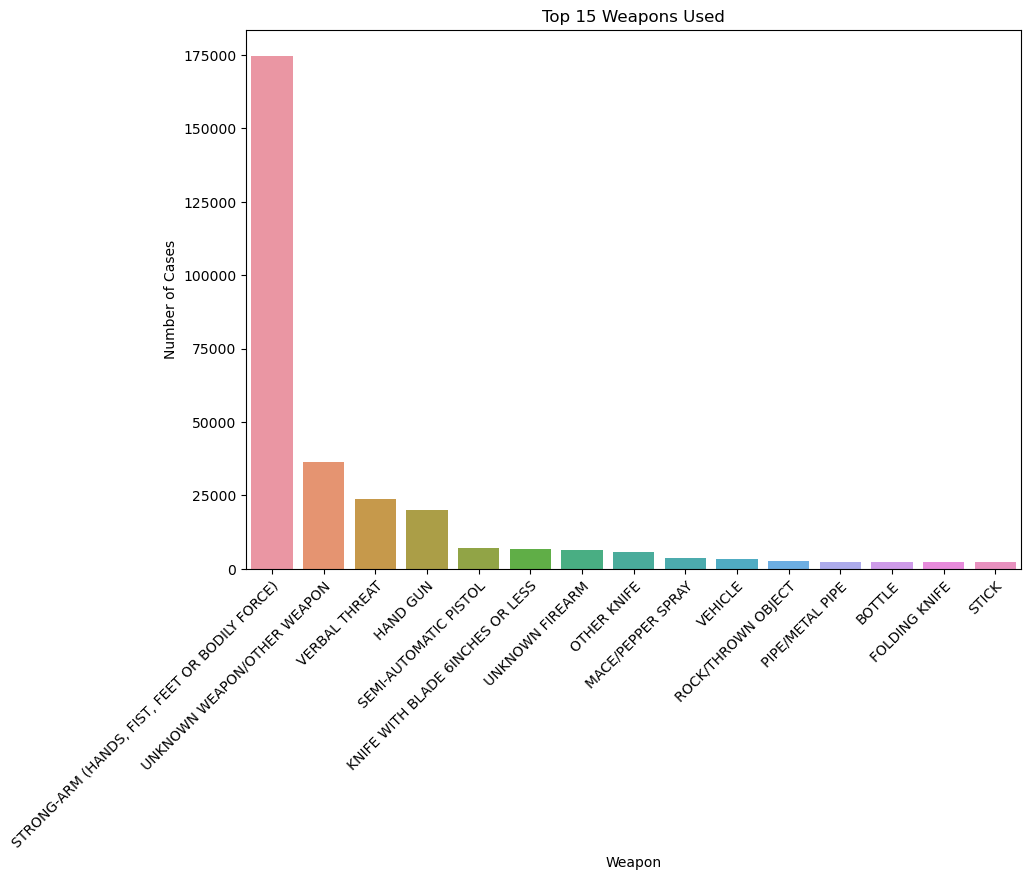

In [6]:
plt.figure(figsize = (10,7))
sns.barplot(x = wep_use.index, y = wep_use.values)
plt.title("Top 15 Weapons Used")
plt.xlabel("Weapon")
plt.ylabel("Number of Cases")
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor') 
#rotates bar names and aligns text with tickpoint
plt.show()

### Crime Distribution by Area in LA

In [10]:
area = df['AREA NAME'].value_counts().head(20)
print(area.to_string())

AREA NAME
Central        69548
77th Street    61703
Pacific        59347
Southwest      57357
Hollywood      52350
N Hollywood    51019
Olympic        49997
Southeast      49894
Newton         49138
Wilshire       48148
Rampart        46772
West LA        45671
Northeast      42857
Van Nuys       42819
West Valley    42088
Devonshire     41689
Harbor         41311
Topanga        41302
Mission        40306
Hollenbeck     37034


### Visualization

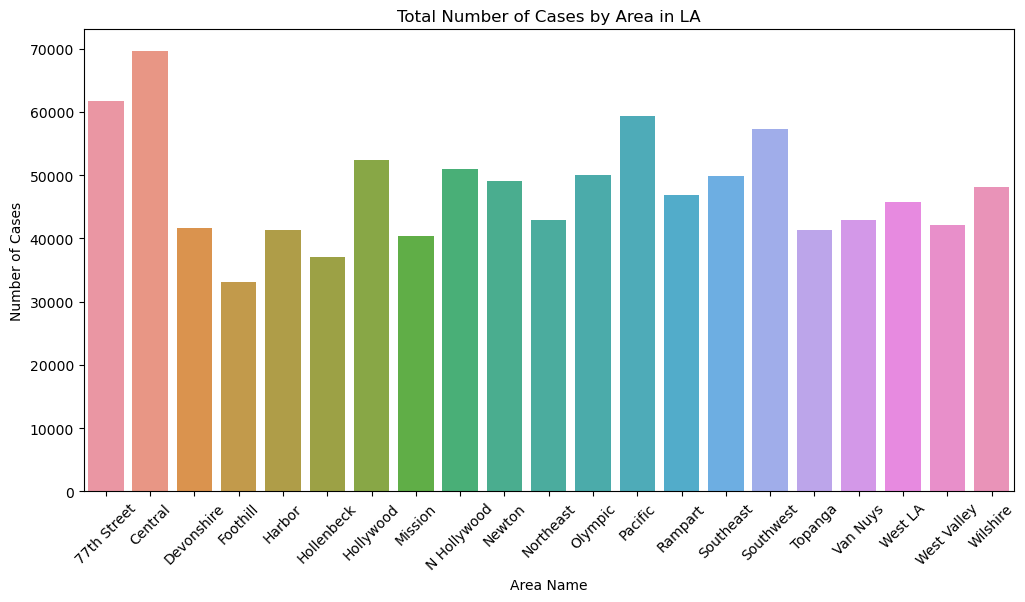

In [9]:
crime_area = df.groupby('AREA NAME')['DR_NO'].count().reset_index()
crime_area.columns = ['AREA NAME', 'Crime Count']

plt.figure(figsize = (12,6))
sns.barplot(x = 'AREA NAME', y = 'Crime Count', data = crime_area)
plt.title("Total Number of Cases by Area in LA")
plt.xlabel("Area Name")
plt.ylabel("Number of Cases")
plt.xticks(rotation = 45) #rotates bar names
plt.show()

### Top 10 Victim Ages

In [15]:
'''
There seems to be some impossible ages (negatives or extremely high).
There is one 120 input so I'm changing all negatives to 120 and it
will be considered as an outlier

'''

df.replace({-1:120, -2:120, -3:120, -4:120},
           inplace = True)
age = df['Vict Age'].value_counts().head(10)
print(age.to_string())

Vict Age
0     268921
30     22249
35     21773
31     21385
29     21310
28     20927
32     20803
33     20321
27     20083
34     19379


### Top 15 Crime Code Description with Victims of Age 0

                                        Crime Cd Desc  Crime Count
0                                    VEHICLE - STOLEN       114839
1     THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)        25026
2            SHOPLIFTING - PETTY THEFT ($950 & UNDER)        21404
3                                            BURGLARY        18099
4   VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        14686
5                                         TRESPASSING         9646
6   THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...         7417
7                  THEFT PLAIN - PETTY ($950 & UNDER)         6760
8                                             ROBBERY         6495
9            VANDALISM - MISDEAMEANOR ($399 OR UNDER)         5279
10           SHOPLIFTING-GRAND THEFT ($950.01 & OVER)         3933
11         EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)         3555
12                          OTHER MISCELLANEOUS CRIME         2560
13  VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...         

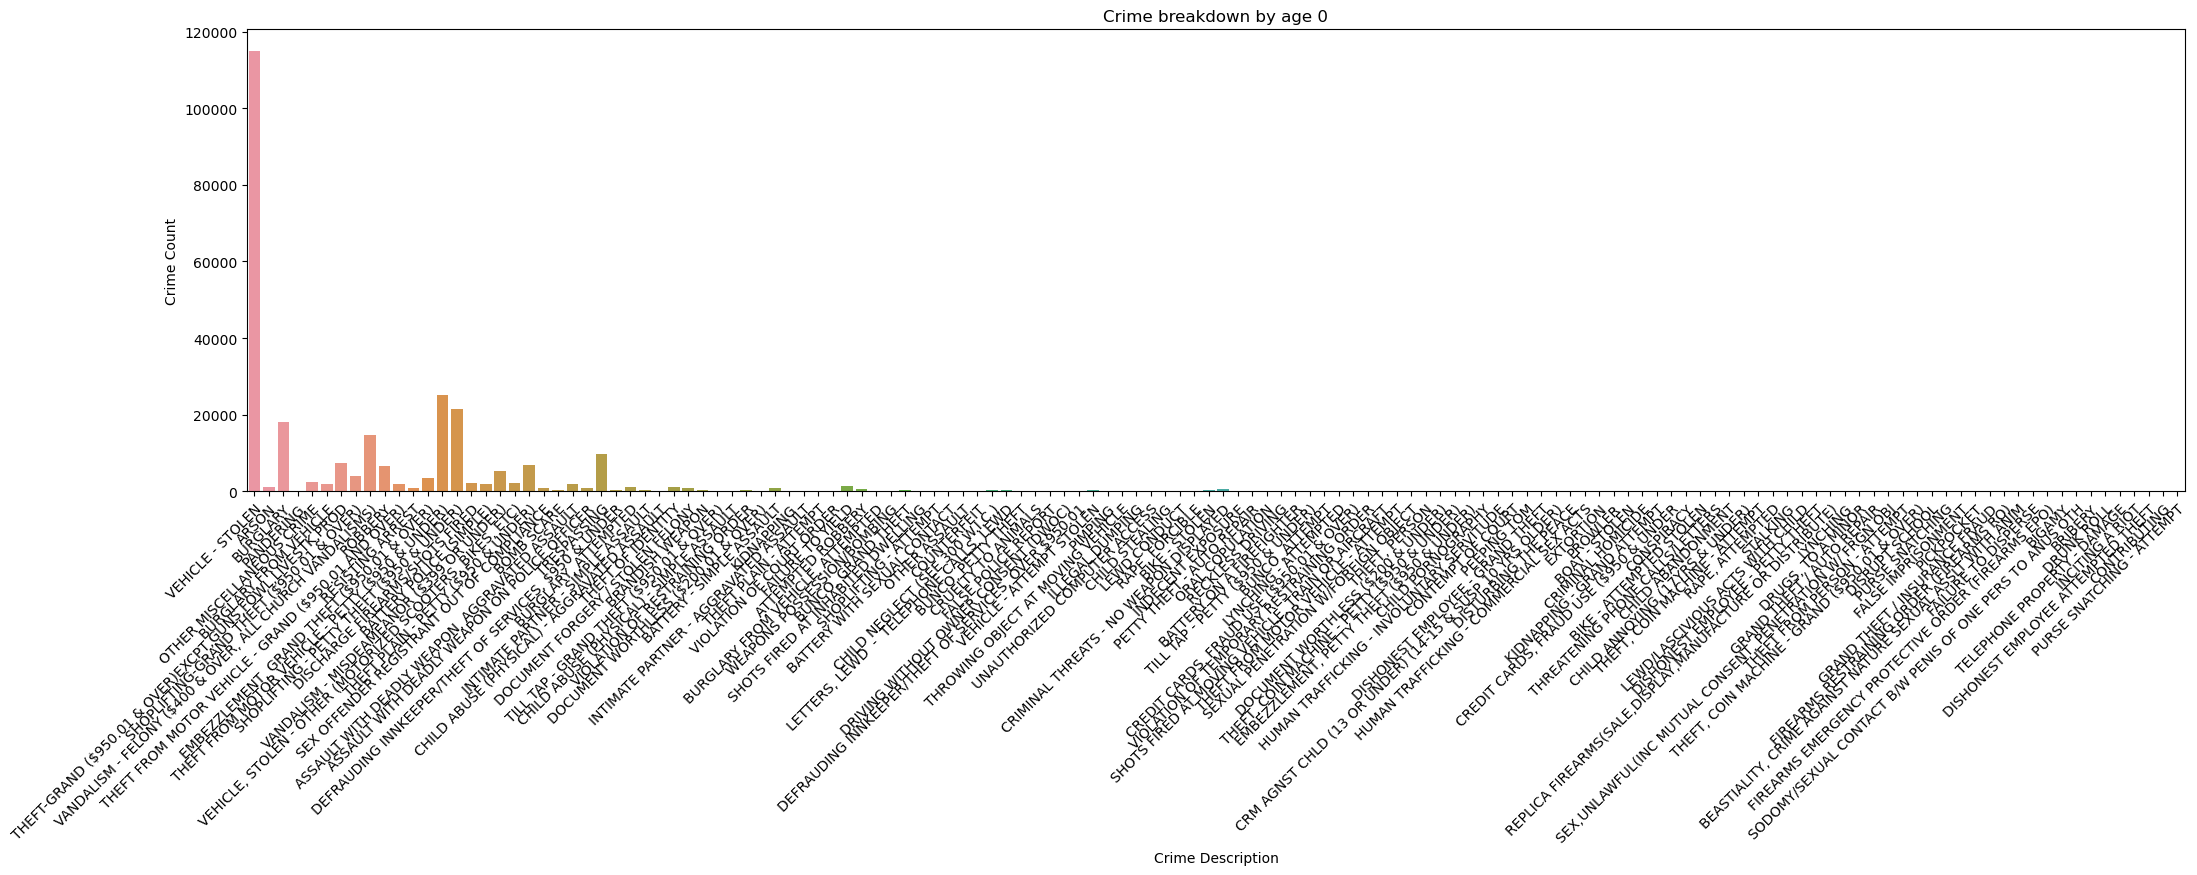

In [20]:
#why is there so many age 0 victims?
crime = df['Crm Cd Desc']
age0 = df[df['Vict Age'] == 0]
grouped_counts = age0.groupby('Crm Cd Desc').size().nlargest(15).to_frame().reset_index(inplace = False)
grouped_counts.columns = ['Crime Cd Desc', 'Crime Count']

#age0st = df[(df['Vict Age'] == 0) & (df['Crm Cd Desc'] == 'VEHICLE - STOLEN')].shape[0]
#age0m = df[(df['Vict Age'] == 0) & (df['Crm Cd Desc'] == 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)')].shape[0]
print(grouped_counts)


### Visualization

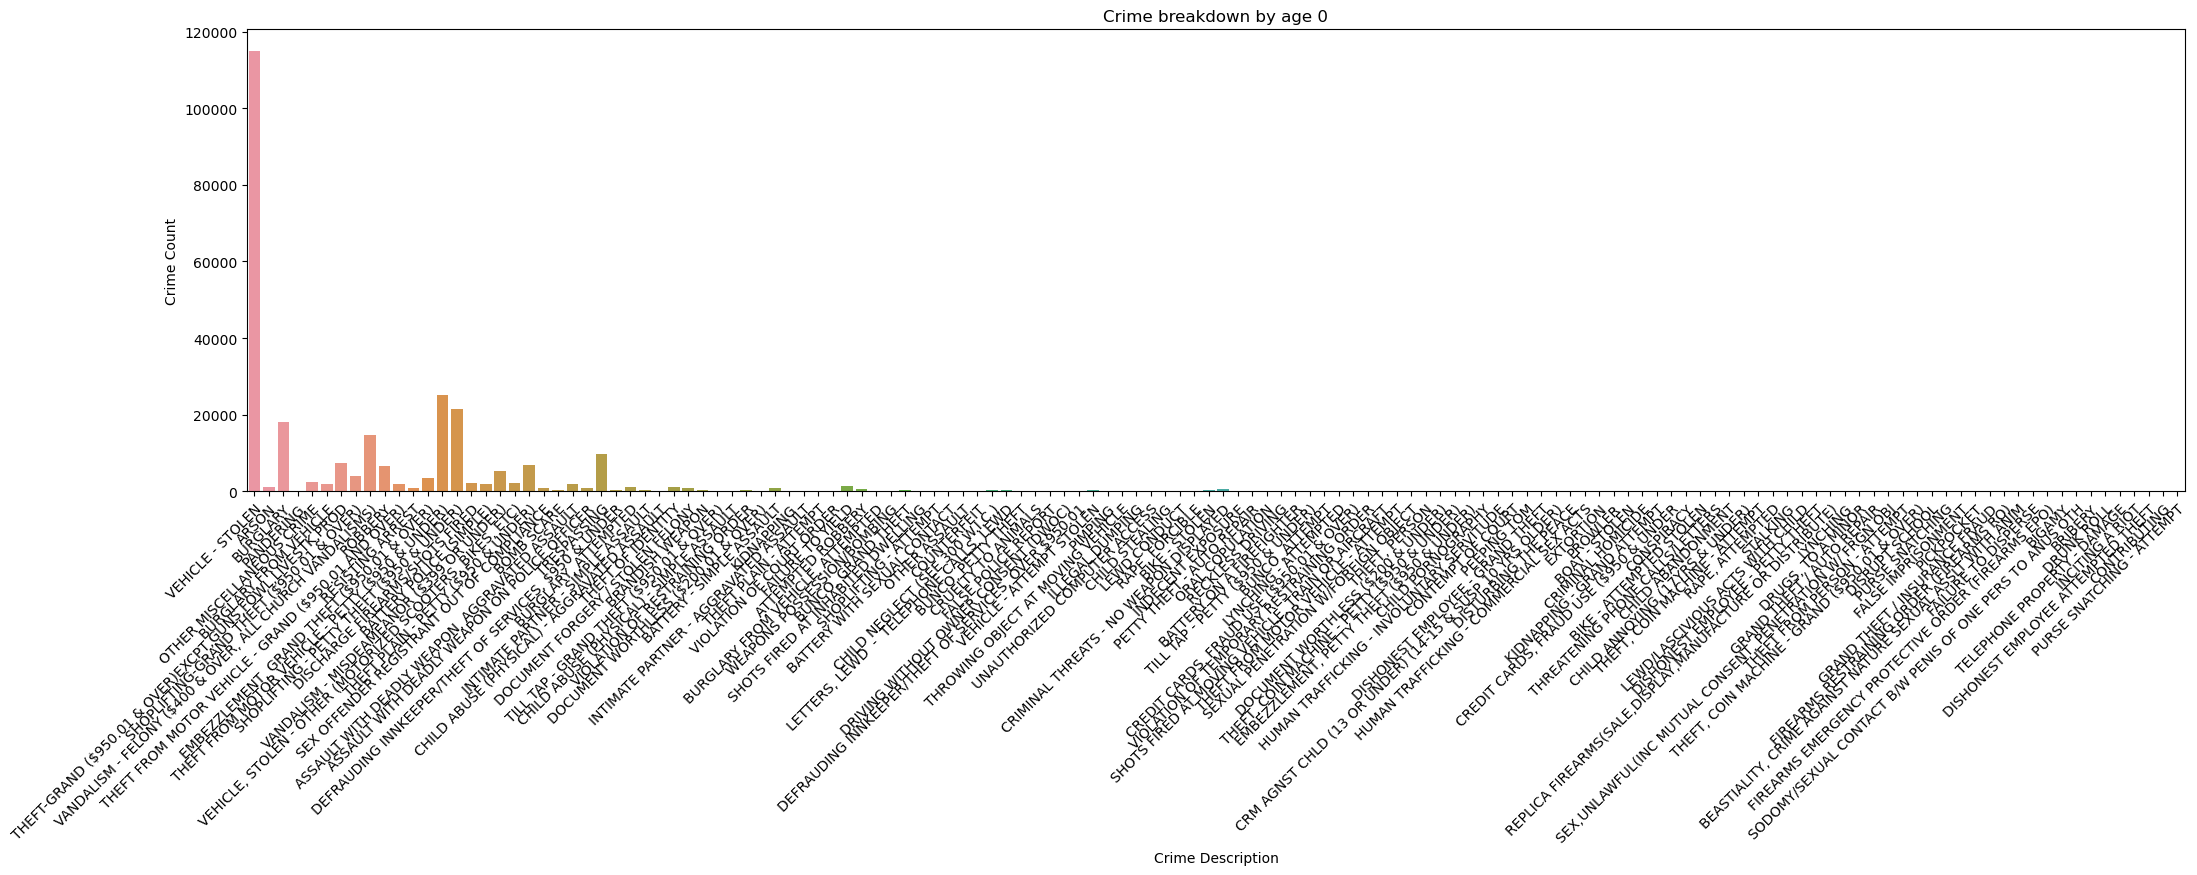

In [21]:
plt.figure(figsize = (25,6))
sns.countplot(x = 'Crm Cd Desc', data = age0)
#sns.barplot(x = 'Crm Cd Desc', y = 'Crime Count', data = grouped_counts)
plt.title("Crime breakdown by age 0")
plt.xlabel("Crime Description")
plt.ylabel("Crime Count")
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.show()

### Victim Sex Distribution

In [22]:
'''
There is an unclarified '-' marked as the gender of a victim
so I have replaced it with 'X' which means unknown

'''

df.replace({'-':'X', 'H':'X'}, inplace = True)
gender_count = df['Vict Sex'].value_counts(3)
print(gender_count.to_string())

Vict Sex
M    0.469455
F    0.416848
X    0.113698


### Visualization

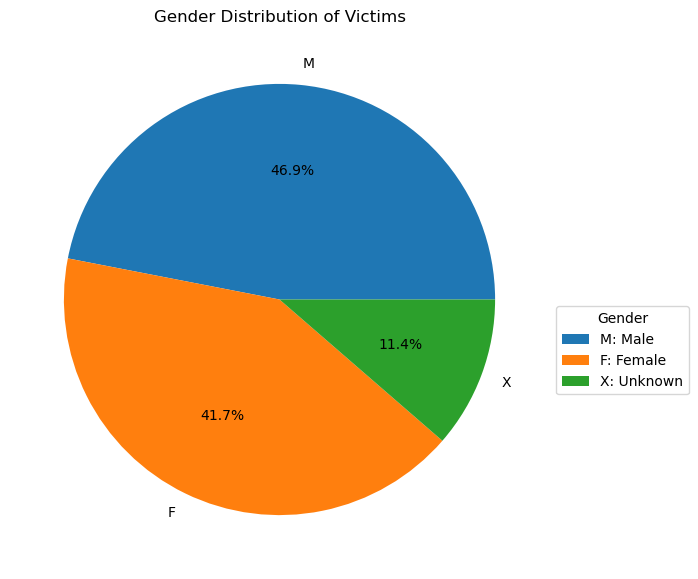

In [23]:
plt.figure(figsize = (7, 7))
plt.pie(gender_count, labels = gender_count.index,
       autopct = '%1.1f%%')           
plt.title("Gender Distribution of Victims")
plt.legend(title = 'Gender', loc = "upper left", bbox_to_anchor = (1.0, 0.5),
          labels = ["M: Male", "F: Female", "X: Unknown"])
plt.show()

### FBI Crime Classification (Part 1 or 2)

In [25]:
#FBI crime classification, Part 1 for less serious and Part 2 for more serious
part_count = df['Part 1-2'].value_counts(2)
print(part_count.to_string())


Part 1-2
1    0.599474
2    0.400526


### Visualization

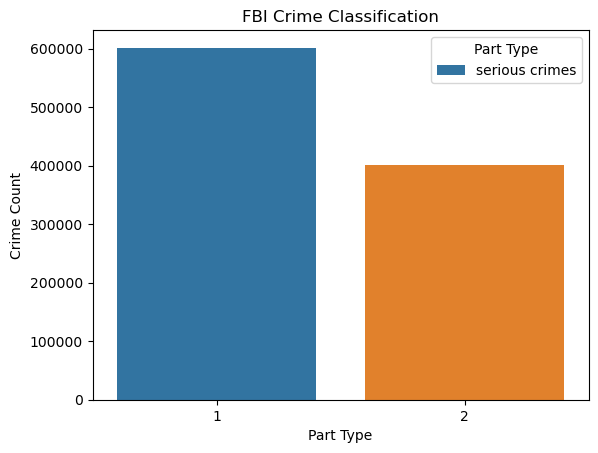

In [24]:
sns.countplot(x = 'Part 1-2', data = df)
plt.title("FBI Crime Classification")
plt.xlabel("Part Type")
plt.ylabel("Crime Count")
plt.legend(title = 'Part Type', loc = "upper right",
          labels = ["serious crimes", "less serious crimes"])
plt.show()

### Visualization of Ethnicity Distribution of Victims

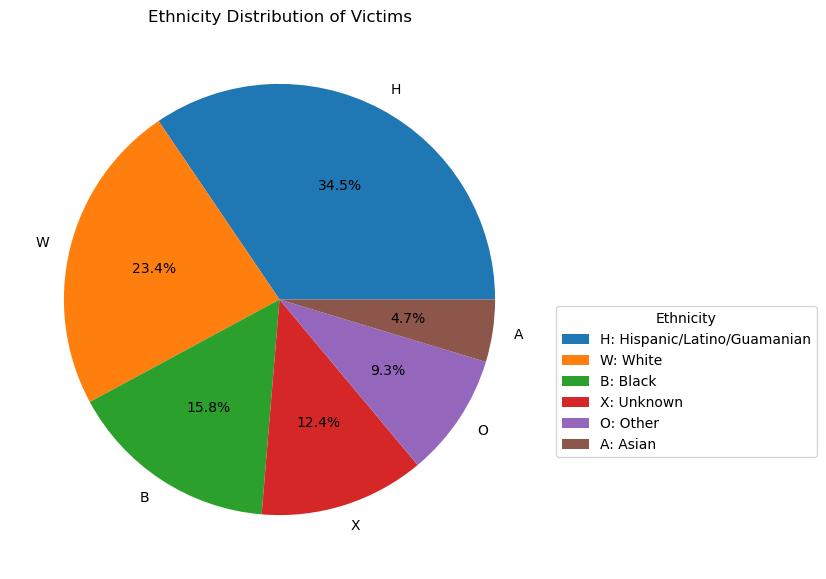

In [263]:
df.replace({'F':'A', 'C':'A', 'D':'A', 'G':'H', 'J':'A', 'K':'A', 'L':'A', 'P':'O', 
            'S':'P', 'U':'P', 'V':'A', 'Z':'A', 'I':'O'}, inplace = True)
desc_count = df['Vict Descent'].value_counts(5)

plt.figure(figsize = (7, 7))
plt.pie(desc_count, labels = desc_count.index,
       autopct = '%1.1f%%')           
plt.title("Ethnicity Distribution of Victims")
plt.legend(title = 'Ethnicity', loc = "upper left", bbox_to_anchor = (1.0, 0.5),
          labels = ["H: Hispanic/Latino/Guamanian", "W: White", 
                    "B: Black", "X: Unknown", "O: Other", "A: Asian"])
plt.show()